In [15]:
#Import packages
import numpy as np
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points



In [28]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [40]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
#drop "id" axis=1 means drop column, axis=0 means drop label
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)



 mu = 180921.20 and sigma = 79415.29



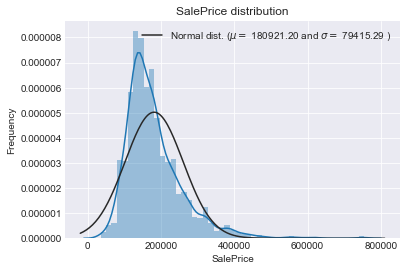

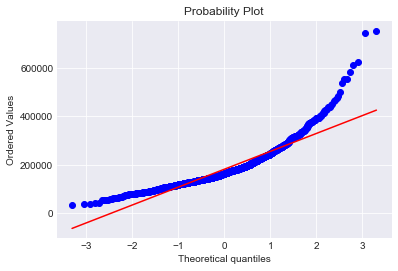

In [41]:
#Analyze target variables...."Sales Proce"
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



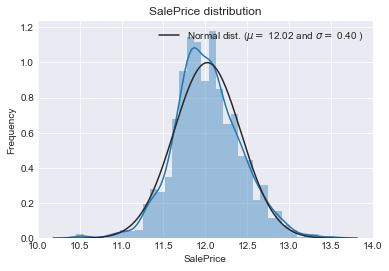

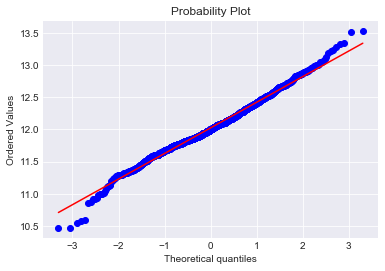

In [42]:
#Log transformation of the target variable
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [43]:
#Feature engineering
#Combine two dataset into one
#c.shape(0)
ntrain = train.shape[0]
ntest = test.shape[0]
print(ntrain)
print(ntest)
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

1460
1459
all_data size is : (2919, 79)


In [44]:
#find out missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657
MiscFeature,96.403
Alley,93.217
Fence,80.439
FireplaceQu,48.647
LotFrontage,16.650
GarageQual,5.447
GarageCond,5.447
GarageFinish,5.447
GarageYrBlt,5.447


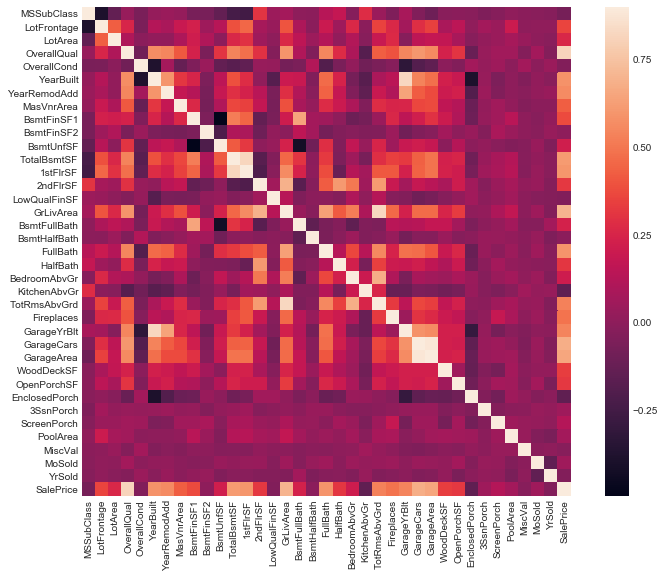

In [45]:
#variables correlation with "Salesprice"
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

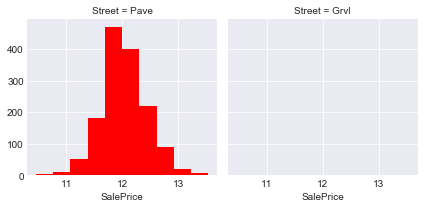

In [46]:
g = sns.FacetGrid(train,col="Street")
g.map(plt.hist, "SalePrice", color="red");

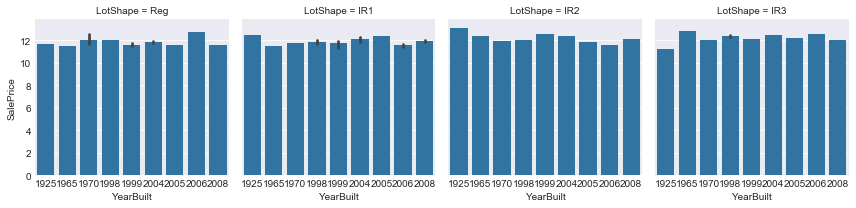

In [47]:
g = sns.FacetGrid(train, col="LotShape")
g.map(sns.barplot, "YearBuilt", "SalePrice");

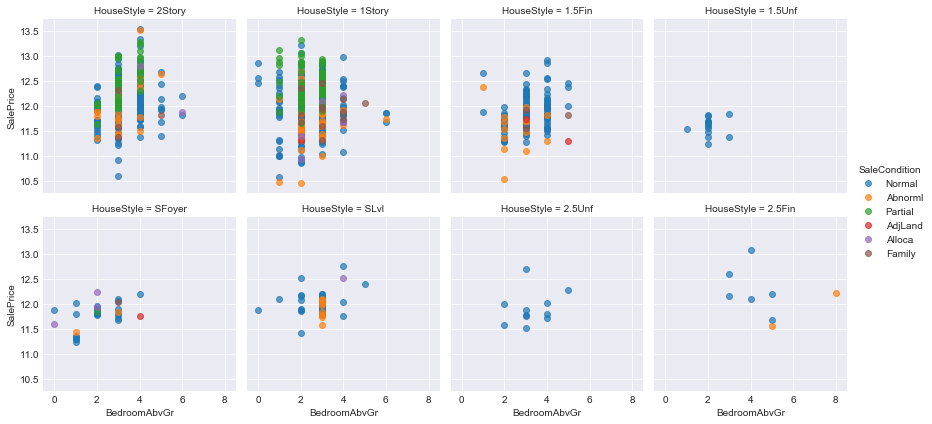

In [48]:
g = sns.FacetGrid(train, col="HouseStyle", hue="SaleCondition",col_wrap=4)
g.map(plt.scatter, "BedroomAbvGr", "SalePrice", alpha=.7)
g.add_legend();

In [49]:
#Imputing missing values
# 1.PoolQC
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
# 2.MiscFeature
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
# 3.Alley
all_data["Alley"] = all_data["Alley"].fillna("None")
# 4.Fence 
all_data["Fence"] = all_data["Fence"].fillna("None")
# 5.FireplaceQu
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [50]:
# 6.LotFrontage: 
#Since the area of each street connected to the house property most likely 
#have a similar area to other houses in its neighborhood , 
#we can fill in missing values by the median LotFrontage of the neighborhood.
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [51]:
# 7. GarageType, GarageFinish, GarageQual and GarageCond : 
#Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [52]:
#8. GarageYrBlt, GarageArea and GarageCars : 
# Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [53]:
#9. BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : 
# missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [54]:
#10. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
# For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [55]:
#11. MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. 
# We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [56]:
#12. MSZoning (The general zoning classification) : 
#'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])


In [57]:
#13. Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA .
# Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)

In [58]:
#14. Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [59]:
#15. Electrical : It has one NA value. 
# Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [60]:
#16. KitchenQual: Only one NA value, and same as Electrical, 
# we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [61]:
#17. Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. 
# We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [62]:
#18. SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [63]:
#19. MSSubClass : Na most likely means No building class. 
# We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [64]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [65]:
#Transforming some numerical variables that are really categorical
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [66]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [67]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [68]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947
PoolArea,16.898
LotArea,12.822
LowQualFinSF,12.089
3SsnPorch,11.376
LandSlope,4.975
KitchenAbvGr,4.302
BsmtFinSF2,4.146
EnclosedPorch,4.004
ScreenPorch,3.947


In [69]:
#Box Cox Transformation of (highly) skewed features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [70]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [73]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print(train.shape)
train.head()

(1460, 221)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.693,11.686,0.000,0.730,1.541,1.820,1.541,11.170,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1
1,12.792,0.000,0.000,0.730,1.541,1.820,0.730,12.063,0.000,0.000,...,0,0,0,0,0,0,0,0,0,1
2,11.892,11.725,0.000,0.730,1.541,1.820,1.194,10.200,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1
3,12.014,11.354,0.000,0.730,1.541,0.730,1.541,8.274,0.000,0.000,...,0,0,0,0,0,0,0,0,0,1
4,12.511,12.271,0.000,0.730,1.820,1.820,0.000,10.971,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1


In [77]:
#Modelling
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [78]:
#cross validation strategy
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [79]:
#LASSO Regression :This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [80]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1240 (0.0165)



In [82]:
lasso.fit(train.values, y_train)
lasso_train_pred = lasso.predict(train.values)
lasso_pred = np.expm1(lasso.predict(test.values))

In [83]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = lasso_pred
sub.to_csv('Predicted_Prices.csv',index=False)

In [84]:
sub.head()

,Id,SalePrice
0,1461,117291.018
1,1462,152279.817
2,1463,182939.490
3,1464,197656.637
4,1465,198157.995


In [85]:
sub.tail()

,Id,SalePrice
1454,2915,89280.767
1455,2916,84407.024
1456,2917,173692.676
1457,2918,118081.998
1458,2919,225268.151
